# IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


THERE IS NO USE OF HAVING CCA3,CAPITAL SO, we are removing them


In [ ]:
df.drop(['CCA3','Capital'],axis=1,inplace=True) # axis=1 removes column and inplace represents permenant change in dataset
df.head()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


**TOTAL NO.OF COUNTRIES IN EACH CONTINENT**

In [ ]:
country_count=df['Continent'].value_counts()
fig=px.bar(y=country_count.values,
       x=country_count.index,
       color=country_count.index,
       template='plotly_dark',
       color_discrete_sequence=px.colors.sequential.PuBuGn,
       text=country_count.values,
      title='NO.OF COUNTRIES BY CONTINENT')
fig.update_layout(
xaxis_title='CONTINENTS',
yaxis_title='NO.of countries')

fig.show()



In [ ]:
df.isnull().sum()

Rank                           0
Country/Territory              0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64



THERE ARE NO NULL VALUES THAT WE NEED TO TAKE CARE OF.

**TOP 10 highest population**

In [ ]:
df['2022 Population'].sort_values(ascending=False)[:10]

41     1425887337
92     1417173173
221     338289857
93      275501339
156     235824862
149     218541212
27      215313498
16      171186372
171     144713314
131     127504125
Name: 2022 Population, dtype: int64









# BAR PLOT FOR DIFFERENT CONTINENTS USING PLOTPLY




In [ ]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    Continents_population=df.groupby(by='Continent')[feature].sum().sort_values(ascending=False)
    fig=px.bar(x=Continents_population.index,
           y=Continents_population.values,
           color=Continents_population,
           text=Continents_population.values,
           color_discrete_sequence=px.colors.sequential.PuBu,
           title=feature+'POPULATION BY CONTINENTS',
          template='plotly_dark')
    fig.update_layout(xaxis_title='Countries',yaxis_title='Population_count')
    fig.show()

# PIE CHART OF POPULATION RATION AND COUNT BY CONTINENT IN DIFFERNT YEARS

In [ ]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    Continents_population=df.groupby(by='Continent')[feature].sum().sort_values(ascending=False)
    fig = px.pie(values=Continents_population.values,
             names=Continents_population.index,
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= feature+' Ratio And Count By Continent',template='plotly_dark')
    fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))
    fig.show()

# MAP VISUALISATION OF POPULATION BY YEARS

In [ ]:
features = ['2022 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']

for feature in features:
    fig = px.choropleth(df,
                        locations='Country/Territory',
                        locationmode='country names',
                        color=feature,
                        hover_name='Country/Territory',
                        template='plotly_dark',
                        title=feature)
    fig.show()


**Although the population has increased over the past 10 years, there has not been a great change in the continents in percentage.
Asia, Africa and Europe alone constitute more than 80 percent of the world's population.**

**TOP 8 POPULATED COUNTRIES**

In [ ]:
country_population = df.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(8)
country_population

Country/Territory
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Nigeria           218541212
Brazil            215313498
Bangladesh        171186372
Name: 2022 Population, dtype: int64

**BARPLOT OF TOP 8 POPULATED COUNTRIES**

In [ ]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    country_population = df.groupby(by = 'Country/Territory')[feature].sum().sort_values(ascending=False).head(8)
    fig=px.bar(x=country_population.index,
       y=country_population.values,
       color=country_population.index,
       text=country_population.values,
      template='plotly_dark',
          title=feature + ' per Country')
    fig.update_layout(xaxis_title='Country',
                 yaxis_title='Population')
    fig.show()

**ABOVE WE CAN SEE POPULATION OF TOP 8 COUNTRIES IN THEIR RESPECTIVE YEARS**




**POPULATION GROWTH**



In [ ]:
GROWTH=(df.groupby(by='Country/Territory')['2022 Population'].sum()-df.groupby(by='Country/Territory')['1980 Population'].sum()).sort_values(ascending=False).head(8)
GROWTH

Country/Territory
India            720344788
China            443514871
Pakistan         155200805
Nigeria          145589773
Indonesia        127324243
United States    115149839
Brazil            93025115
Ethiopia          88434455
dtype: int64

# POPULATION GROWTH

In [ ]:
fig=px.bar(x=GROWTH.index,
       y=GROWTH.values,
       color=GROWTH.index,
       text=GROWTH.values,
       title='GROWTH OF POPULATION FROM 1980 TO 2020',
       template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRY',
                 yaxis_title='POPULATION GROWTH')
fig.show()

**AS WE CAN OBSERVE INDIA IS TOP COUNTRY WHERE POPULATION GROWTH IS THE HIGHEST AMONG ALL PRECEDED BY CHINA**

In [ ]:
df.head(2)

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


In [ ]:
df['area_per_person']=df['Area (km²)'] / df['2022 Population']
area_per_person_incountry=df.groupby(by='Country/Territory')['area_per_person'].sum()
area_per_person_incountry

Country/Territory
Afghanistan          0.015858
Albania              0.010114
Algeria              0.053042
American Samoa       0.004495
Andorra              0.005863
                       ...   
Wallis and Futuna    0.012271
Western Sahara       0.461817
Yemen                0.015668
Zambia               0.037597
Zimbabwe             0.023943
Name: area_per_person, Length: 234, dtype: float64

In [ ]:
area_per_person_incountry.sort_values(ascending=True).head(5)

Country/Territory
Macau        0.000043
Monaco       0.000055
Singapore    0.000119
Hong Kong    0.000147
Gibraltar    0.000184
Name: area_per_person, dtype: float64

**ONLY 0.000043KM2 LAND AVAILABLE IN SINGLE PERSON IN MACAU ACCORDING TO THEIR POPULATION**

# LAND AVAILABLE PER PERSON IN COUNTRY

In [ ]:
fig=px.bar(x=area_per_person_incountry.sort_values(ascending=True).head(5).index,
            y=area_per_person_incountry.sort_values(ascending=True).head(5).values,
            color=area_per_person_incountry.sort_values(ascending=True).head(5).index,
            text=area_per_person_incountry.sort_values(ascending=True).head(5).values,
            title='Lowest land available countries per person',
            template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE PER PERSON')
fig.show()

In [ ]:
area_per_person_incountry.sort_values(ascending=False).head(5)

Country/Territory
Greenland           38.360890
Falkland Islands     3.220370
Western Sahara       0.461817
Mongolia             0.460254
Namibia              0.321625
Name: area_per_person, dtype: float64

**GREELAND IS THE MOST LAND AVAILABLE COUNTRY PER PERSON**

In [ ]:
fig=px.bar(x=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            y=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            color=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            text=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            title='MOST LAND AVAILABLE COUNTRIES PER PERSON',
            template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE PER PERSON')
fig.show()

#  LAND AVAILABLE PER COUNTRY

In [ ]:
most_land=df.groupby(by='Country/Territory')['Area (km²)'].sum().sort_values(ascending=False).head(5)
most_land

Country/Territory
Russia           17098242
Canada            9984670
China             9706961
United States     9372610
Brazil            8515767
Name: Area (km²), dtype: int64

**RUSSIA IS THE TOP COUNTRY ACQUARING MOST LAND IN THE WORLD and VATICAN CITY IS THE LOWEST**

In [ ]:
fig=px.bar(x=most_land.sort_values(ascending=False).head(5).index,
            y=most_land.sort_values(ascending=False).head(5).values,
            color= most_land.sort_values(ascending=False).head(5).index,
            text= most_land.sort_values(ascending=False).head(5).values,
            title='MOST LAND AVAILABLE COUNTRIES',
            template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE')
fig.show()

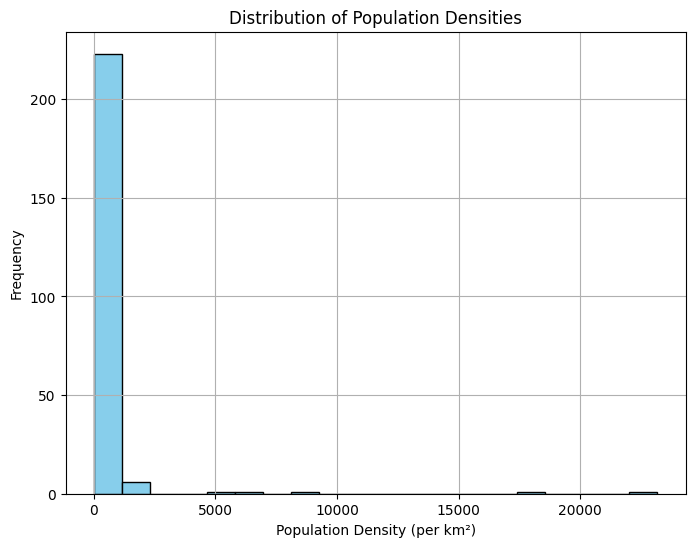

In [ ]:

densities = df['Density (per km²)']

plt.figure(figsize=(8, 6))
plt.hist(densities, bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Population Densities')
plt.xlabel('Population Density (per km²)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


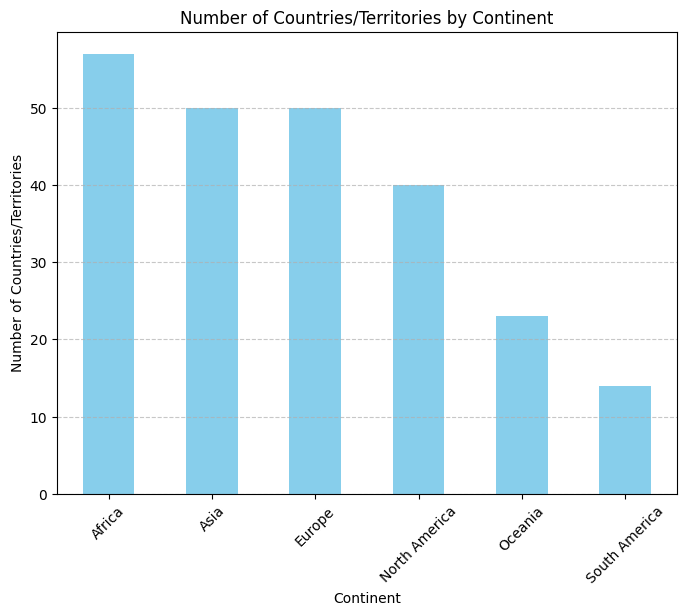

In [ ]:
country_count = df['Continent'].value_counts()

plt.figure(figsize=(8, 6))
country_count.plot(kind='bar', color='skyblue')
plt.title('Number of Countries/Territories by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries/Territories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
